# Модуль 1
-------------------

In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Алгоритмы кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

### 1.1 Парсинг данных

In [2]:
df = pd.read_csv('data/train_2.csv', delimiter=';', low_memory=False)
#df2 = pd.read_csv('data/train_1.csv', delimiter=';', low_memory=False)
#df_merge = df.merge(df2, how='outer')

In [3]:
df

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0
...,...,...,...,...,...,...,...,...,...,...
199995,500000004694875418,60,5,42,2,3,3,0,60000,62.0
199996,500000004694884558,19,0,37,2,-1,4,1,68000,40.0
199997,500000004694909288,33,3,44,2,1,1,2,58000,26.0
199998,500000004694952000,0,0,31,2,-1,-1,0,NaN,79.0


In [4]:
df = df_merge.truncate(after=250000)

In [5]:
df_mer

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,31.10.2021 11:30:06,5462,106,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,22.10.2021 10:46:13,5921,"226,96",KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,05.09.2021 10:02:10,4121,102,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,13.10.2021 21:24:47,5691,21642,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,27.10.2021 19:47:16,5399,4026,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249996,500000000000941823,128,1,37,2,-1,1,0,82500,47.0,1,01.09.2021 6:10:04,5541,178,"RNAZSBN02-166\SAGITOVA, 1B\STERLITAMAK\453130 ..."
249997,500000000000941823,128,1,37,2,-1,1,0,82500,47.0,1,15.10.2021 19:00:10,5813,168,BEER BANK\D. 15 IVLEVA STR\STERLITAMAK\450000 ...
249998,500000000000941823,128,1,37,2,-1,1,0,82500,47.0,1,17.08.2021 14:07:05,5441,299,IP MATSUK L.N.\UL. MIRA 1/B\STERLITAMAK\453109...
249999,500000000000941823,128,1,37,2,-1,1,0,82500,47.0,2,09.10.2021 19:16:01,5651,438,"LLC MAXIMA GROUP\KHUDAYBERDINA, 120\STERLITAMA..."


In [4]:
df["INCOME_MAIN_AMT"] = df["INCOME_MAIN_AMT"].astype(str).str.replace(",", ".").astype(float)
#Приводим данный атрибут в числовой формат(в вещественные числа), в данном методе используем replace(заменяет запятую на точку) 
#и astype(переводит в вещественный тип данных)

In [5]:
df = df[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE']]

<AxesSubplot:>

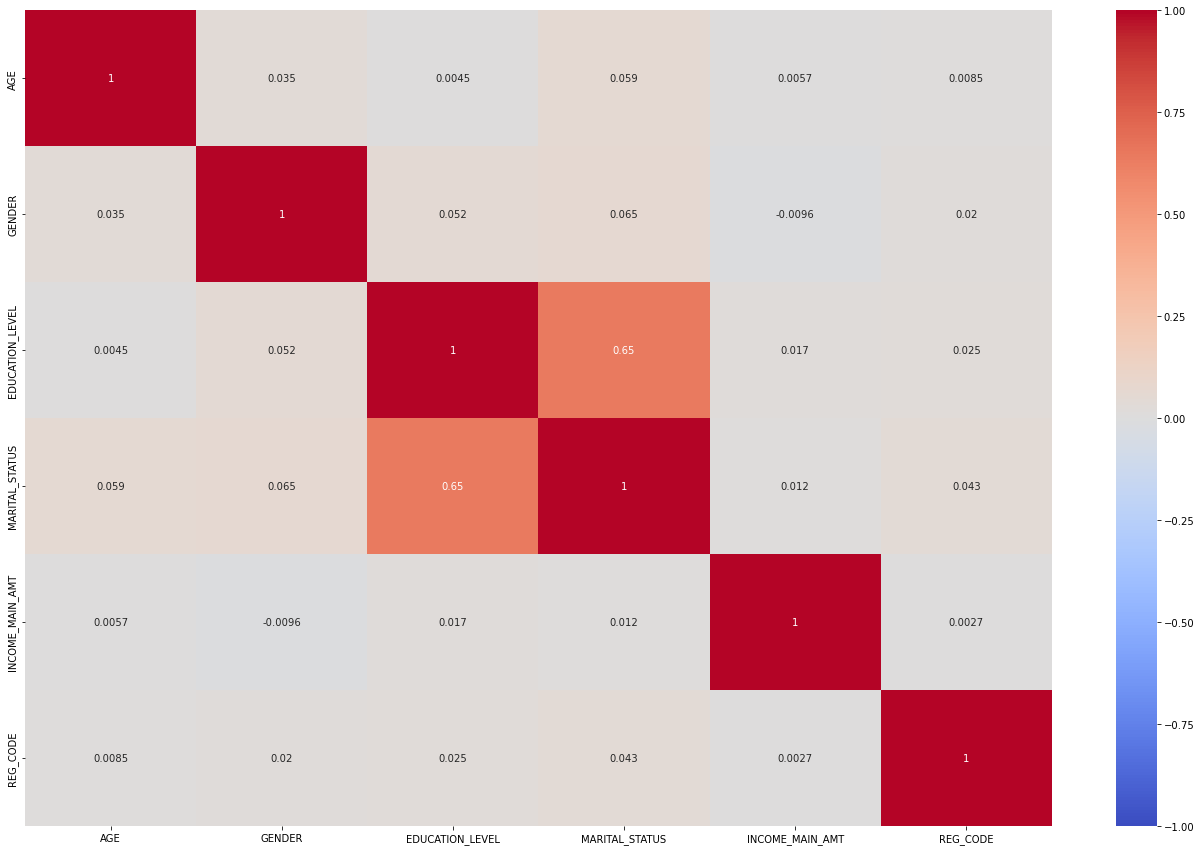

In [7]:
plt.figure(figsize=(23, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:<br>
MATIRIAL_STATUS и EDUCATION_LEVEL<br>
EDUCATION_LEVEL и DEPENDANT_CNT<br>
MM_W_CARD и MM_IN_BANK<br>
ID и MM_IN_BANK<br>

### 1.3 Предварительная обработка данных  

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\samurai jack\AppData\Local\Temp\ipykernel_13248\3528310598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


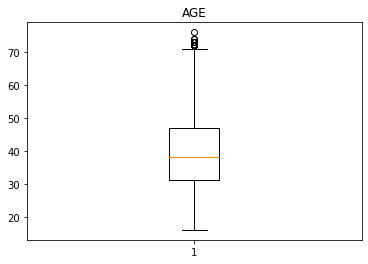

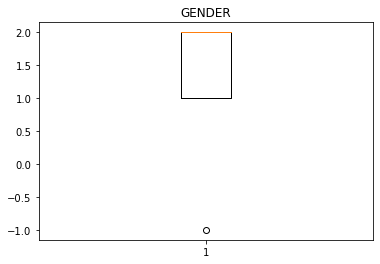

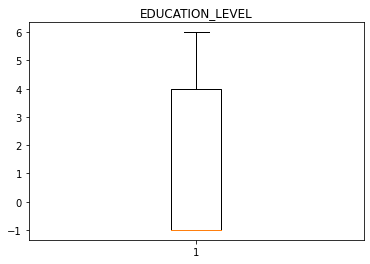

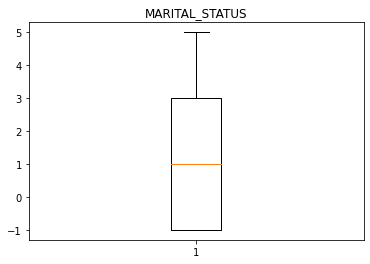

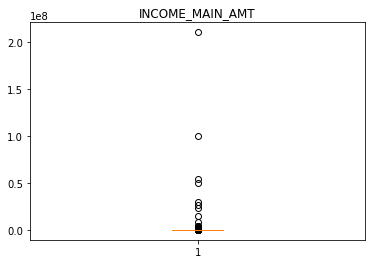

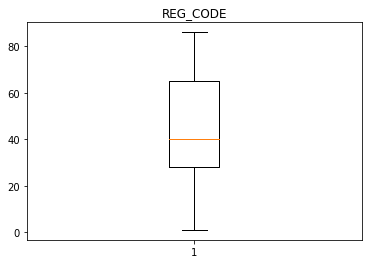

In [10]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

In [11]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  

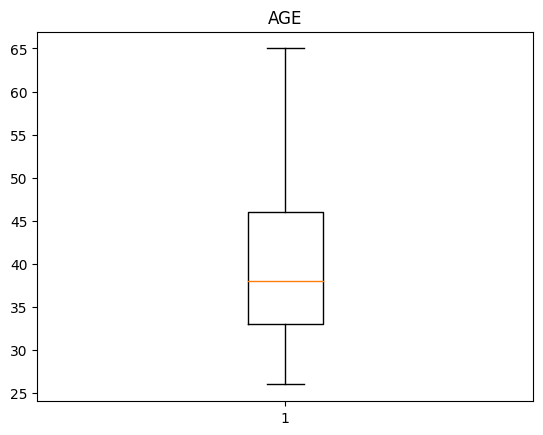

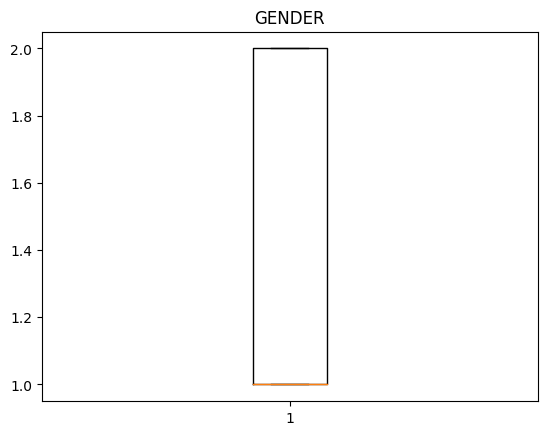

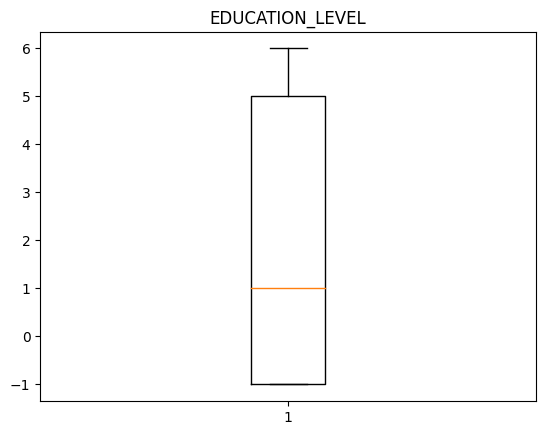

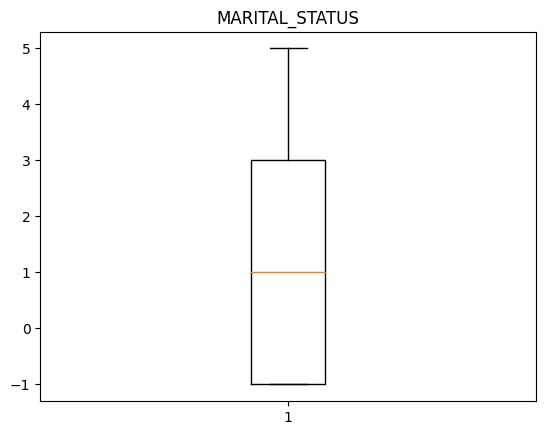

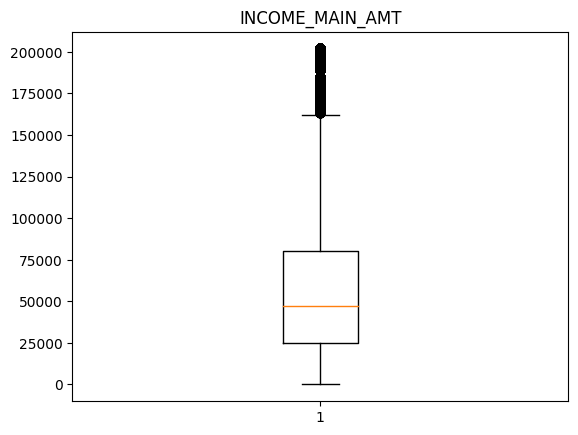

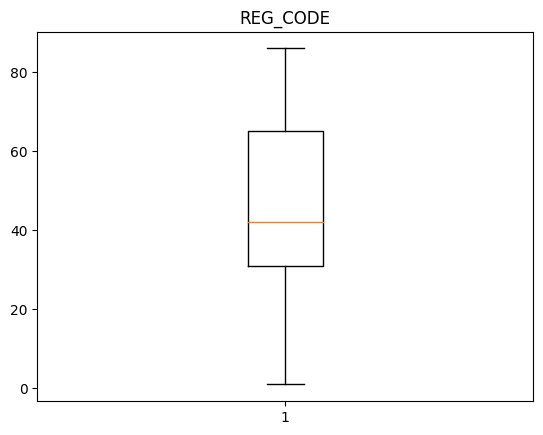

In [12]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df_mer.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df_mer[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

### 1.4 Формирование дополнительных атрибутов

Перевод из рублей в евро и юани

In [12]:
df['INCOME_MAIN_AMT_EUR'] = df['INCOME_MAIN_AMT'].apply(lambda x: x / 80)


In [13]:
df['INCOME_MAIN_AMT_CNY'] = df['INCOME_MAIN_AMT'].apply(lambda x: x / 11)

In [14]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909
1,34,2,3,3,180000.0,31.0,2250.0,16363.636364
2,35,1,1,3,61000.0,38.0,762.5,5545.454545
4,39,1,-1,3,34000.0,81.0,425.0,3090.909091
5,40,1,1,4,69000.0,81.0,862.5,6272.727273
...,...,...,...,...,...,...,...,...
103719,40,1,-1,-1,30000.0,32.0,375.0,2727.272727
103720,42,2,3,3,60000.0,62.0,750.0,5454.545455
103721,37,2,-1,4,68000.0,40.0,850.0,6181.818182
103722,44,2,1,1,58000.0,26.0,725.0,5272.727273


Был создан дополнительный атрибут, который демонстрирует курс рубля к юаням, а так же и к евро. Т.к. было бы интересно посмотреть сколько это бы стоило по другому курсу валют.

### 1.5 Кластеризация

Подготовка данных
Отдельно возьму атрибуты, которые буду визуализировать

In [15]:
#Помещу их в переменную X
X = df[["AGE", "GENDER", "EDUCATION_LEVEL"]]

Я выбрал эти атрибуты, так как в зависимости от региона и категории товара (продовца) стоимость покупок будет разной и я считаю, что этих атрибутов будет достаточно что бы модель не имела проблем с переобучением и недообучением

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.


In [16]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

#### PCA
Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

In [17]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

#### Функция визуализации
Отдельно вынесу функцию для визуализации

In [18]:
#Функция для визуализации распределения 
def viz(prediction):
    #Размер фигуры
    plt.figure(figsize=(12, 12))
    plt.subplot(224)
    #Выводить изображение буду при помощи scatter
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    #Вывод изображения
    plt.show()

#### Выбор алгоритмов (KMeans, MiniBatchKMeans, GaussianMixtures)
Я решил взять алгоритмы KMeans, MiniBatchKMeans и GaussianMixtures, так как они идеально подходят для такого набора данных, они сочетают в себе скорость работы, а так же качество кластеризации

#### KMeans

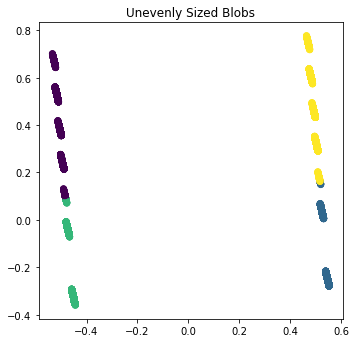

In [19]:
#Настройка параметров
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds

#Применяю функцию описаную выше
viz(df["KMCLUSTS"])

#### MiniBatchKMeans

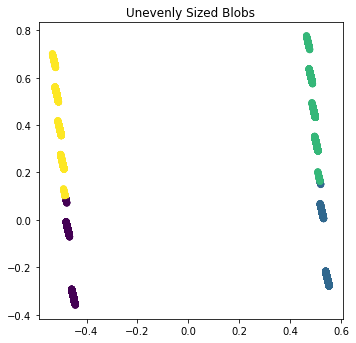

In [20]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
df["KBCLUSTS"] = kbmeans.fit_predict(X)

viz(df["KBCLUSTS"])

#### GaussianMixture

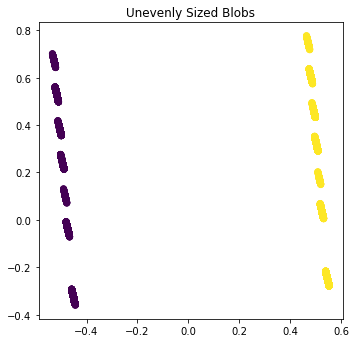

In [21]:
#Настройка параметров
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
df["GMCLUSTS"] = gm

viz(df["GMCLUSTS"])

#### Результаты метрик

##### Kmeans 

In [23]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KMCLUSTS"]))

729267.6099995751
0.3091012814057943


##### MiniBatchKmeans


In [24]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KBCLUSTS"]))

729266.9754418383
0.3090519600778654


##### GussianMixture

In [25]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["GMCLUSTS"]))

191971.809200034
0.6197288380542696


#### Решение
По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

In [26]:
# Удаление ненужных атрибутов с кластерами
df.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

### 1.6 Подготовка отчета

* 1.1 - На основании файлов Data1.csv и Data2.csv построен исходный набор данных. Набор данных преобразован в единый файл формата .csv. Набор был дополнен доп данными, т.к. они могут были полезны для дальнейшего исследования.

* 1.3 - Был предобработан набор данных на содержание пропусков и аномалий .
* 1.4 - Были добавленны данные, которые могут быть полезны для дальнейшей работе. 
* 1.5- Выполнина кластеризация данных по сходству покупателей несколькими способами (не менее трех). Выберите метрику оценки качества кластеризации. Обоснуйте выбор методов и приемов. Выполните визуальный анализ кластерных структур и оценки качества кластеризации. Определите лучший алгоритм кластеризации на основе выбранной метрики.

In [27]:
df.to_csv('output.csv', index=False, encoding='utf-8-sig')

--------------

# Модуль 2

-------------

In [28]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [29]:
df = pd.read_csv('output.csv')

### 2.1 Разведочный анализ

In [30]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909,0
1,34,2,3,3,180000.0,31.0,2250.0,16363.636364,0
2,35,1,1,3,61000.0,38.0,762.5,5545.454545,1
3,39,1,-1,3,34000.0,81.0,425.0,3090.909091,1
4,40,1,1,4,69000.0,81.0,862.5,6272.727273,1


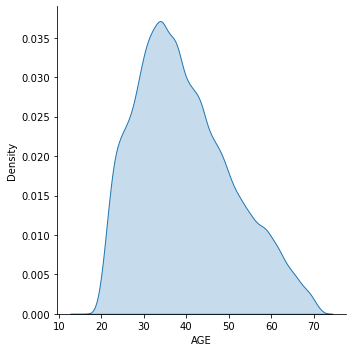

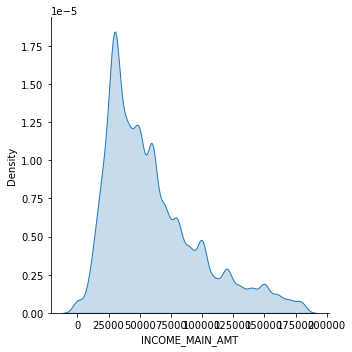

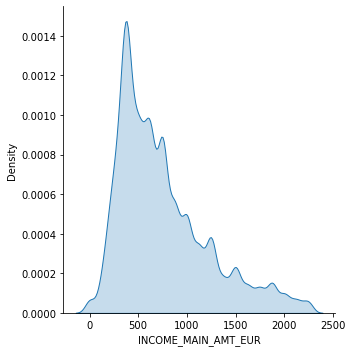

In [31]:
#Лист с признаками которые не будут учитываться при визуализации (Не категориальные)
skip = ['AGE', 'INCOME_MAIN_AMT', 'INCOME_MAIN_AMT_EUR']
#Не категориальные признаки
for i in skip:
    if type(df[i].iloc[2]) == np.int64 or type(df[i].iloc[2]) == np.float64:
        sns.displot(df, x=i, kind="kde", fill=True)

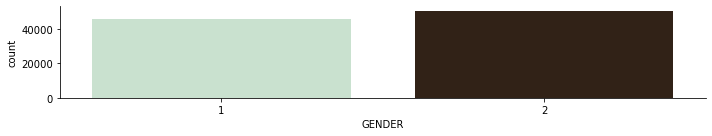

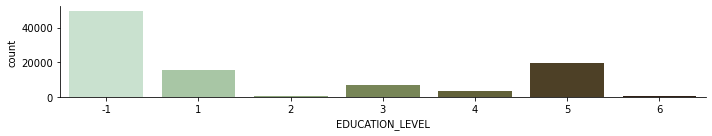

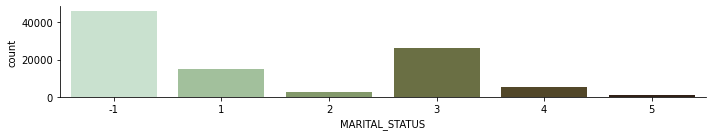

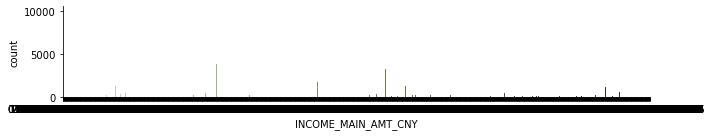

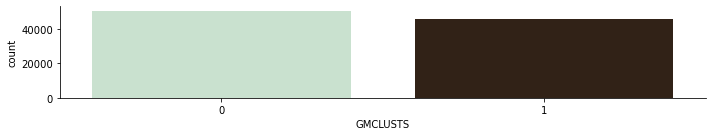

In [32]:
#Категориальные признаки
for i in df.columns:
    if i not in skip and i != 'REG_CODE':
        sns.catplot(x=i, kind='count', palette='ch:25', height=2, aspect=5, data=df)
        plt.show()

REG_CODE плохо визуализировался, так что его можно вывести отдельно

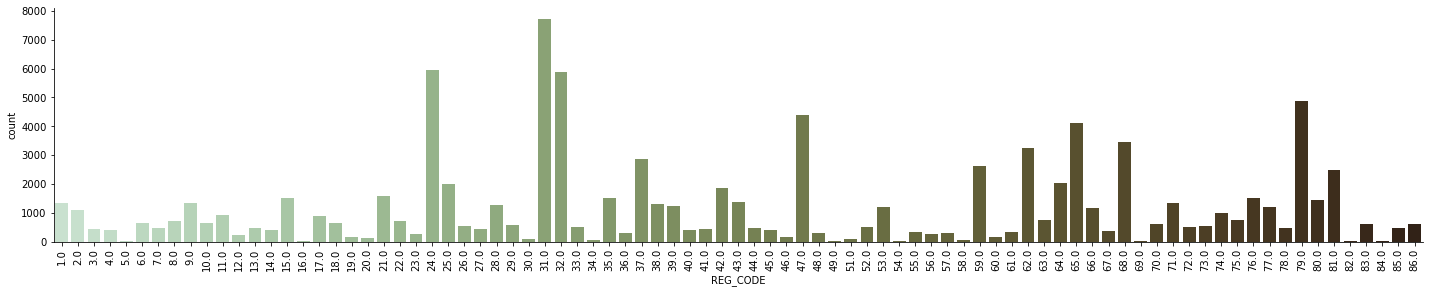

In [33]:
sns.catplot(x='REG_CODE', kind='count', palette='ch:25', height=4, aspect=5, data=df)
plt.xticks(rotation=90)
plt.show()

### 2.2 Разбиение выборки

In [34]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909,0
1,34,2,3,3,180000.0,31.0,2250.0,16363.636364,0
2,35,1,1,3,61000.0,38.0,762.5,5545.454545,1
3,39,1,-1,3,34000.0,81.0,425.0,3090.909091,1
4,40,1,1,4,69000.0,81.0,862.5,6272.727273,1


Система рекомендаций будет определять категорию принадлежности, то есть порекомендовать пользователю товар для мужчин или для женщин

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [35]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [36]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS"]]
y = df["GENDER"]

In [37]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

#### KNN

In [38]:
#Объявление классификатор
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier()

#### GaussianNB

In [39]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

#### LogisticRegression

In [40]:
#Объявление классификатор
clf = LogisticRegression()
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression()

#### Метрики
Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

#### KNN

In [41]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97     13677
           2       0.97      0.98      0.97     15180

    accuracy                           0.97     28857
   macro avg       0.97      0.97      0.97     28857
weighted avg       0.97      0.97      0.97     28857



#### GaussianNB

In [42]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857



#### LogisticRegression

In [43]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857



#### Решение
По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99. В то время как остальные алгоритмы показали 1, что может оказаться переобучением.

### 2.3 Оптимизация модели

#### Генерация новых данных

In [44]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_EUR,INCOME_MAIN_AMT_CNY,GMCLUSTS
0,35,2,3,3,87000.0,9.0,1087.5,7909.090909,0
1,34,2,3,3,180000.0,31.0,2250.0,16363.636364,0
2,35,1,1,3,61000.0,38.0,762.5,5545.454545,1
3,39,1,-1,3,34000.0,81.0,425.0,3090.909091,1
4,40,1,1,4,69000.0,81.0,862.5,6272.727273,1


В данном случае можно воспользоваться уже созданным нами атрибутом INCOME_MAIN_AMT_USD

In [45]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [47]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS", 'INCOME_MAIN_AMT_EUR']]
y = df["GENDER"]

In [48]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

In [49]:
#Объявление классификатор
neigh2 = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neigh2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### Метрика

In [50]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.59      0.84      0.69     13677
           2       0.76      0.47      0.58     15180

    accuracy                           0.64     28857
   macro avg       0.68      0.65      0.64     28857
weighted avg       0.68      0.64      0.63     28857



Модель стала хуже, так что для дальнейшего использования лучше будет оставить первую версию

## Гиперпараметры по умолчанию

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier()

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
base_pred = model.predict(X_test)
base_pred

array([2, 2, 1, ..., 1, 2, 1], dtype=int64)

## Визуализация дерева

In [57]:
from sklearn.tree import plot_tree

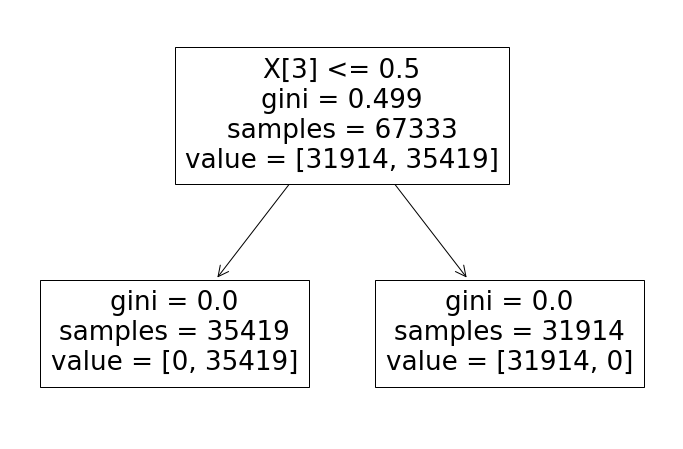

In [58]:
plt.figure(figsize=(12,8))
plot_tree(model);

[Text(0.5, 0.75, 'GMCLUSTS <= 0.5\ngini = 0.499\nsamples = 67333\nvalue = [31914, 35419]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 35419\nvalue = [0, 35419]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 31914\nvalue = [31914, 0]')]

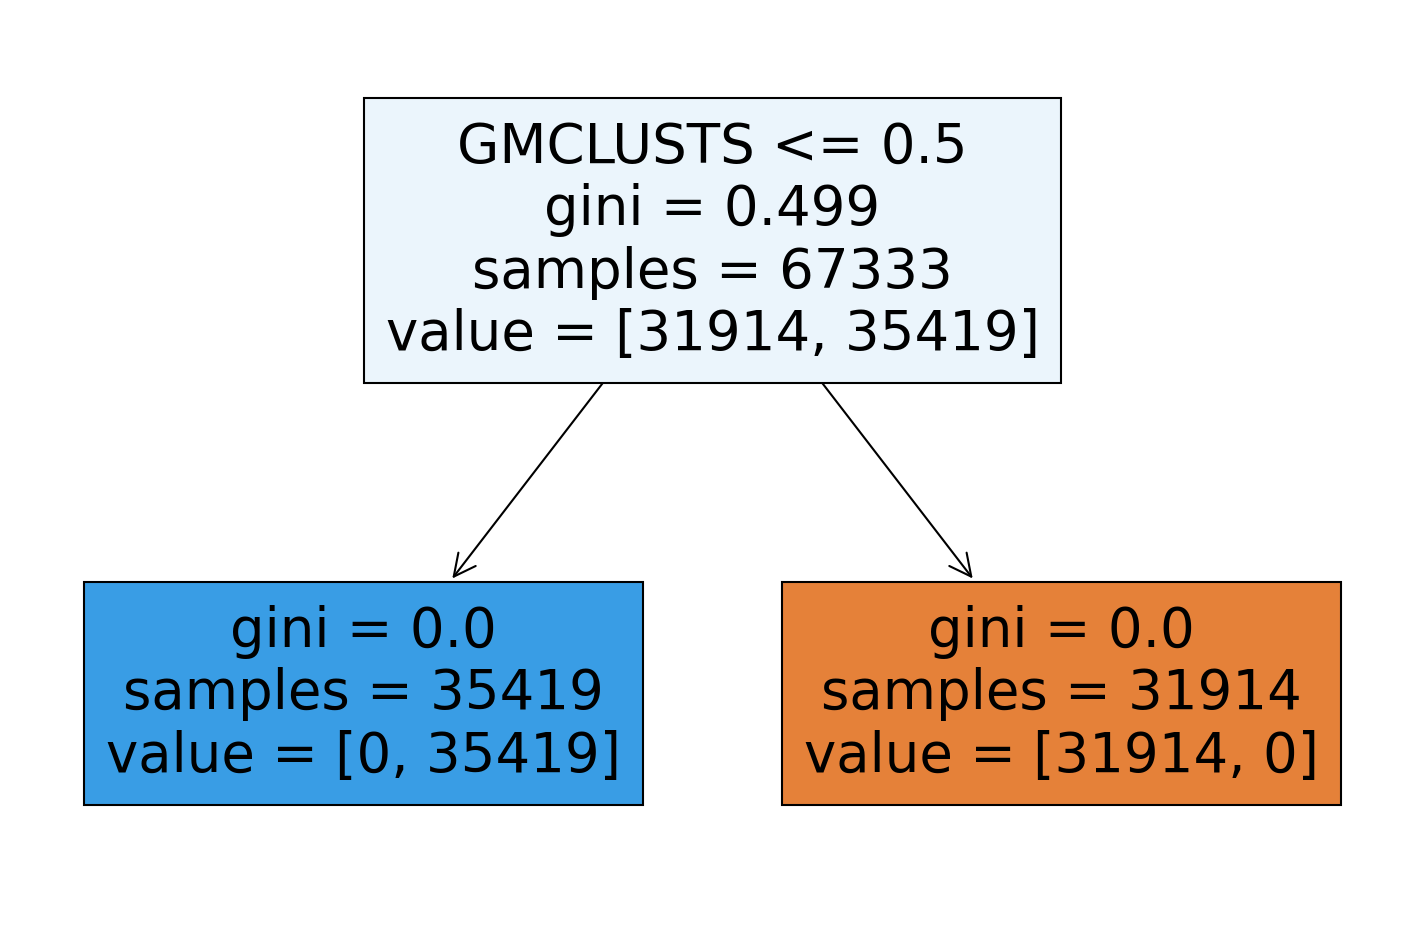

In [59]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)

## Результаты модели

Чтобы поэкспериментировать с гиперпараметрами, давайте создадим функцию, которая возвращает результаты классификации, а также рисует дерево.

In [60]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Гиперпараметры

### Гиперпараметр "Max Depth"

In [61]:
pruned_tree = DecisionTreeClassifier(max_depth=10)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857





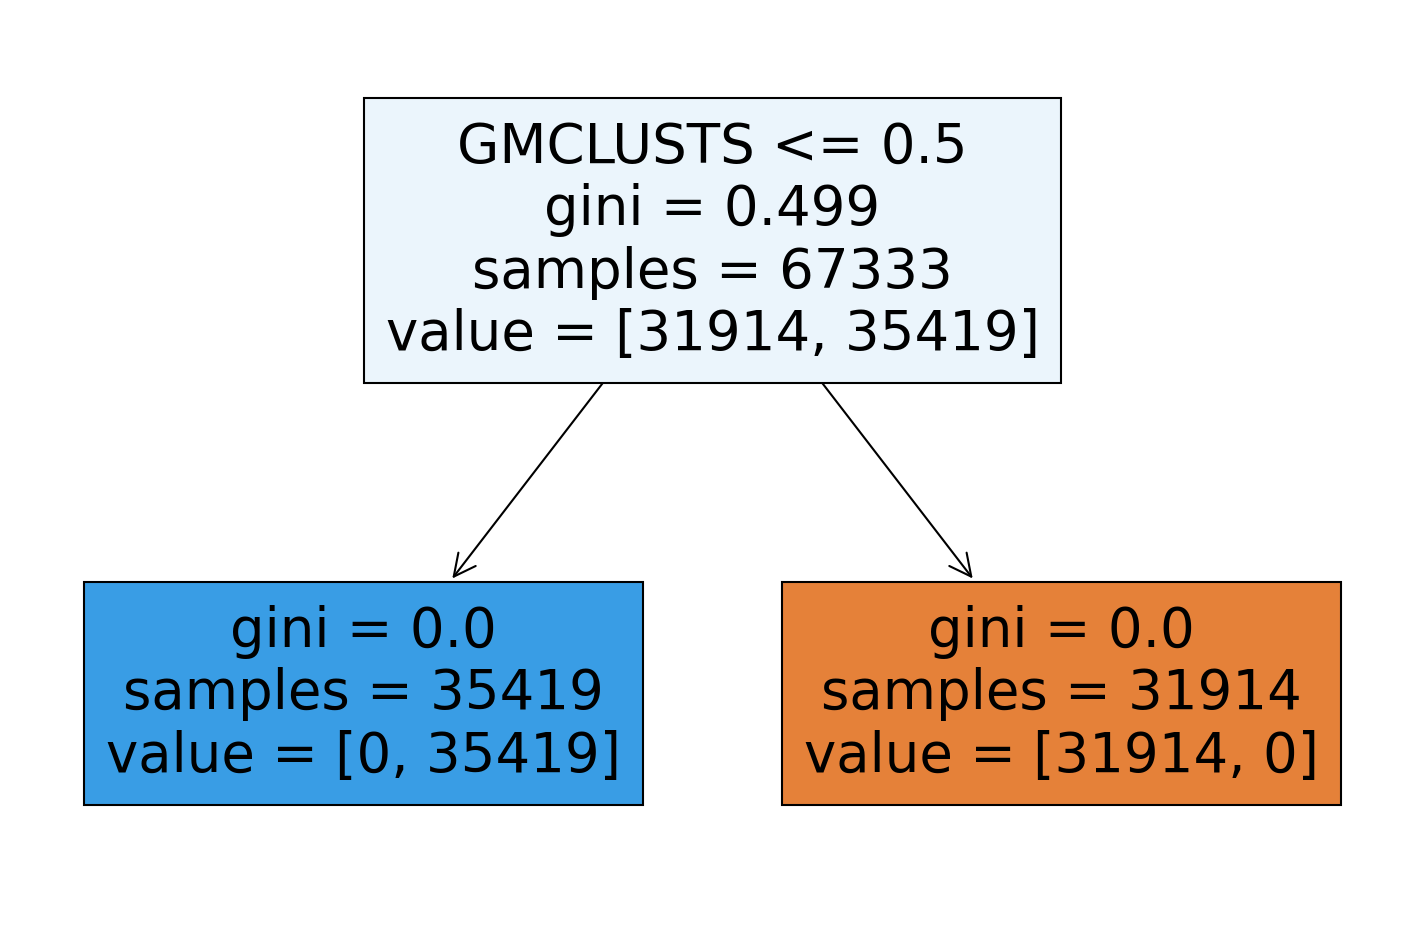

In [62]:
report_model(pruned_tree)

## Гиперпараметр "Max Leaf Nodes"

In [65]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=4)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857





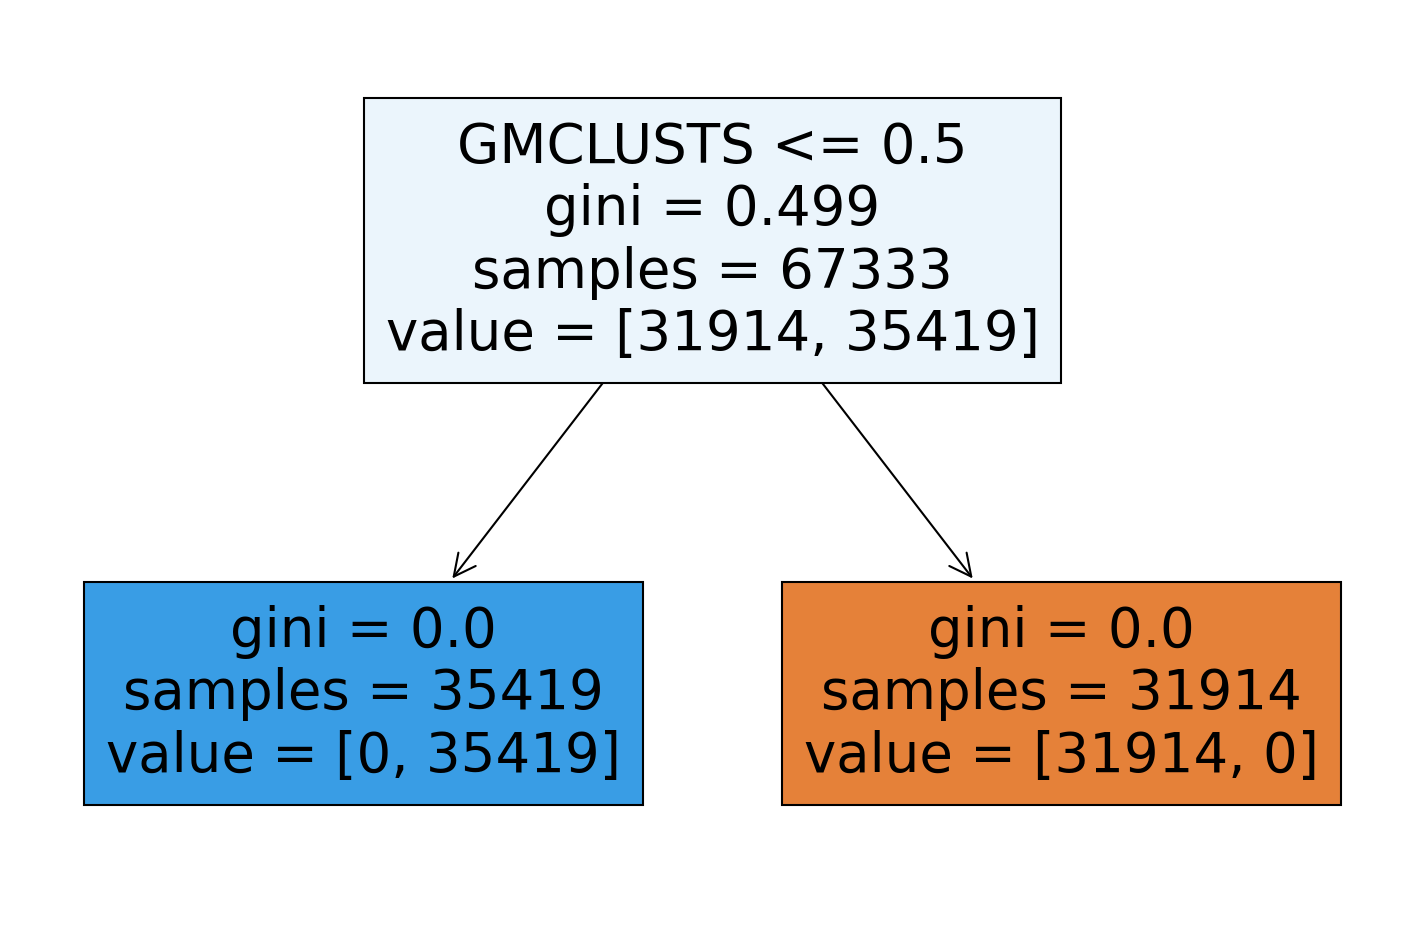

In [66]:
report_model(pruned_tree)

## Гиперпараметр "Criterion"

In [67]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13677
           2       1.00      1.00      1.00     15180

    accuracy                           1.00     28857
   macro avg       1.00      1.00      1.00     28857
weighted avg       1.00      1.00      1.00     28857





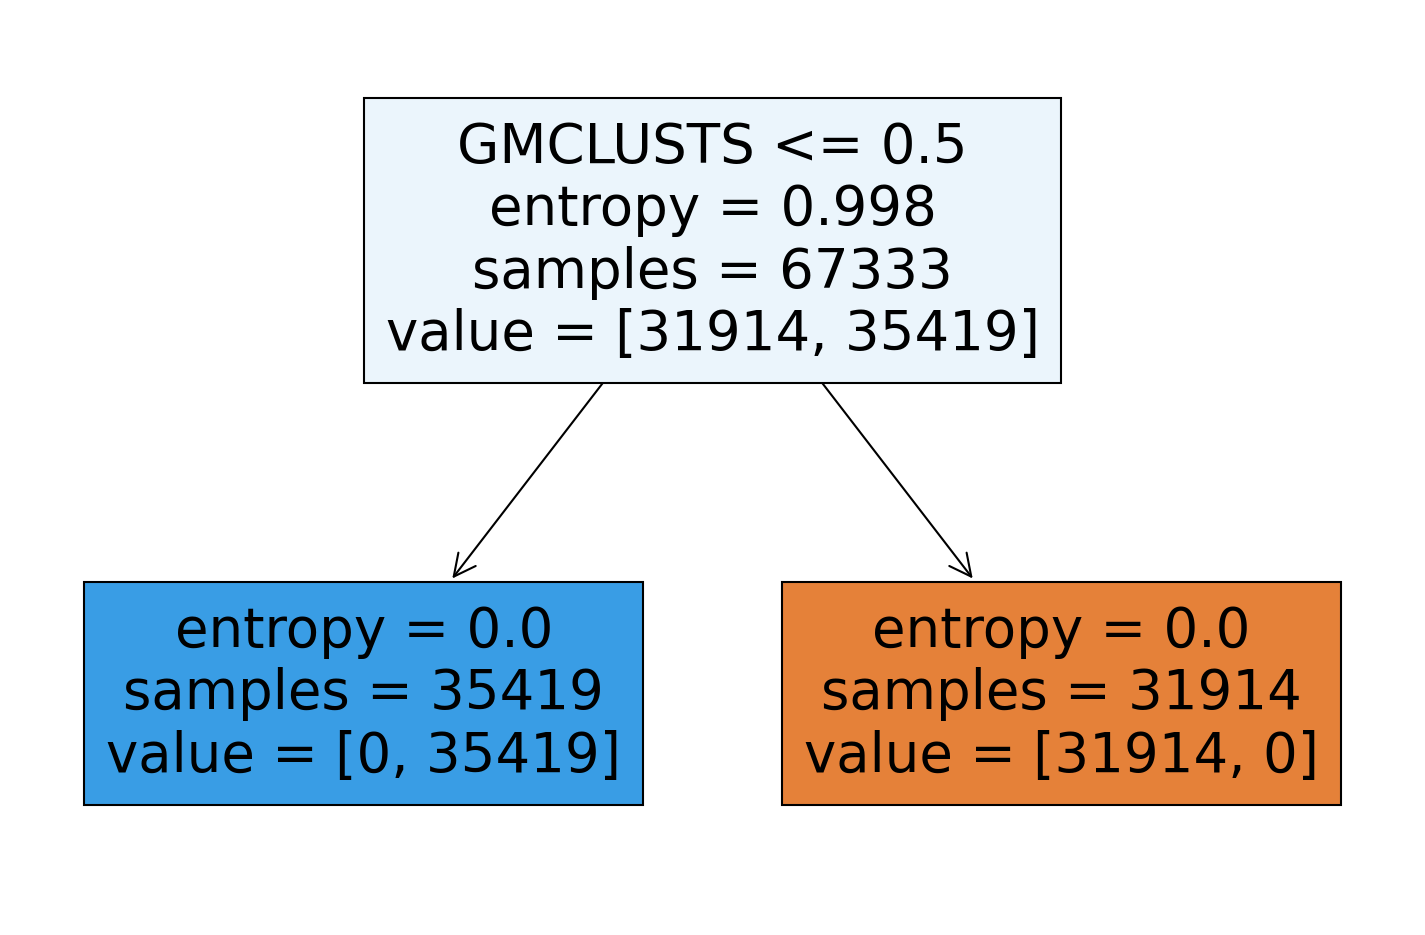

In [68]:
report_model(entropy_tree)

#### Сохранение лучшей модели

Ниже представлен код сохранения модели

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(neigh, open(filename, 'wb'))

Так выглядит загрузка модели

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

### 2.4 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [ ]:
# df.to_csv('output2.csv', index=False, encoding='utf-8-sig')